In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import plotly as px
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_columns", None)

In [55]:
data2015 = "../Data/2015.csv"
data2016 = "../Data/2016.csv"
data2017 = "../Data/2017.csv"
data2018 = "../Data/2018.csv"
data2019 = "../Data/2019.csv"

df1 = pd.read_csv(data2015)
df2 = pd.read_csv(data2016)
df3 = pd.read_csv(data2017)
df4 = pd.read_csv(data2018)
df5 = pd.read_csv(data2019)
df1["Year"]=2015
df2["Year"]=2016
df3["Year"]=2017
df4["Year"]=2018
df5["Year"]=2019

data_frames = [df1, df2, df3, df4, df5]


 Are larger, more developed countries happier?
 Do happy people live longer?
 Are certain regions happier?


In [56]:
maindf = pd.DataFrame()
maindf["Country"] = pd.concat([df1["Country"], df2["Country"], df3["Country"], df4["Country or region"], df5["Country or region"]])
maindf["Economy (GDP per Capita)"] = pd.concat([df1["Economy (GDP per Capita)"], df2["Economy (GDP per Capita)"], df3["Economy..GDP.per.Capita."], df4["GDP per capita"], df5["GDP per capita"]])
maindf["Happiness Score"] = pd.concat([df1["Happiness Score"], df2["Happiness Score"], df3["Happiness.Score"], df4["Score"], df5["Score"]])
maindf["Happiness Rank"] = pd.concat([df1["Happiness Rank"], df2["Happiness Rank"], df3["Happiness.Rank"], df4["Overall rank"], df5["Overall rank"]])
maindf["Health (Life Expectancy)"] = pd.concat([df1["Health (Life Expectancy)"], df2["Health (Life Expectancy)"], df3["Health..Life.Expectancy."], df4["Healthy life expectancy"], df5["Healthy life expectancy"]])
maindf["Generosity"] = pd.concat([df1["Generosity"], df2["Generosity"], df3["Generosity"], df4["Generosity"], df5["Generosity"]])
maindf["Social Support"] = pd.concat([df1["Family"], df2["Family"], df3["Family"], df4["Social support"], df5["Social support"]])
maindf["Freedom"] = pd.concat([df1["Freedom"], df2["Freedom"], df3["Freedom"], df4["Freedom to make life choices"], df5["Freedom to make life choices"]])
maindf["Year"] = pd.concat([df1["Year"], df2["Year"], df3["Year"], df4["Year"], df5["Year"]])
maindf.head()


,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Switzerland,1.39651,7.587,1,0.94143,0.29678,1.34951,0.66557,2015
1,Iceland,1.30232,7.561,2,0.94784,0.43630,1.40223,0.62877,2015
2,Denmark,1.32548,7.527,3,0.87464,0.34139,1.36058,0.64938,2015
3,Norway,1.45900,7.522,4,0.88521,0.34699,1.33095,0.66973,2015
4,Canada,1.32629,7.427,5,0.90563,0.45811,1.32261,0.63297,2015


In [57]:
maindf[["Country", "Economy (GDP per Capita)", "Happiness Score", "Happiness Rank", "Health (Life Expectancy)", "Generosity", "Social Support", "Freedom"]].median()

/var/folders/g8/dnbf824j671c2bqm2ld6k3b80000gn/T/ipykernel_71885/4219247479.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maindf[["Country", "Economy (GDP per Capita)", "Happiness Score", "Happiness Rank", "Health (Life Expectancy)", "Generosity", "Social Support", "Freedom"]].median()


Economy (GDP per Capita)     0.982205
Happiness Score              5.322000
Happiness Rank              79.000000
Health (Life Expectancy)     0.647310
Generosity                   0.201982
Social Support               1.124735
Freedom                      0.431000
dtype: float64

In [58]:
maindf.tail(50)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
106,Albania,0.947,4.719,107,0.874,0.178,0.848,0.383,2019
107,Venezuela,0.960,4.707,108,0.805,0.064,1.427,0.154,2019
108,Cambodia,0.574,4.700,109,0.637,0.232,1.122,0.609,2019
109,Palestinian Territories,0.657,4.696,110,0.672,0.103,1.247,0.225,2019
110,Senegal,0.450,4.681,111,0.571,0.153,1.134,0.292,2019
111,Somalia,0.000,4.668,112,0.268,0.243,0.698,0.559,2019
112,Namibia,0.879,4.639,113,0.477,0.070,1.313,0.401,2019
113,Niger,0.138,4.628,114,0.366,0.188,0.774,0.318,2019
114,Burkina Faso,0.331,4.587,115,0.380,0.177,1.056,0.255,2019
115,Armenia,0.850,4.559,116,0.815,0.095,1.055,0.283,2019


In [59]:
stats_df = pd.DataFrame()

In [60]:
stats_df["Economy (GDP per Capita)"] = [maindf["Economy (GDP per Capita)"].median()]
stats_df["Happiness Score"] = [maindf["Happiness Score"].median()]
stats_df["Health (Life Expectancy)"] = [maindf["Health (Life Expectancy)"].median()]
stats_df["Generosity"] = [maindf["Generosity"].median()]
stats_df["Social Support"] = [maindf["Social Support"].median()]
stats_df["Social Support)"] = [maindf["Social Support"].median()]

In [61]:
stats_df.head()

,Economy (GDP per Capita),Happiness Score,Health (Life Expectancy),Generosity,Social Support,Social Support)
0,0.982205,5.322,0.64731,0.201982,1.124735,1.124735


In [62]:
maindf2 = maindf.sort_values(by="Health (Life Expectancy)", ascending=False)

In [63]:
substitute = (maindf2.index <=10) & (maindf2["Year"]==2015)
tten_2015_df = maindf2.loc[substitute].reset_index(drop=True)
tten_2015_df

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Iceland,1.30232,7.561,2,0.94784,0.43630,1.40223,0.62877,2015
1,Switzerland,1.39651,7.587,1,0.94143,0.29678,1.34951,0.66557,2015
2,Australia,1.33358,7.284,10,0.93156,0.43562,1.30923,0.65124,2015
3,Israel,1.22857,7.278,11,0.91387,0.33172,1.22393,0.41319,2015
4,Sweden,1.33171,7.364,8,0.91087,0.36262,1.28907,0.65980,2015
5,New Zealand,1.25018,7.286,9,0.90837,0.47501,1.31967,0.63938,2015
6,Canada,1.32629,7.427,5,0.90563,0.45811,1.32261,0.63297,2015
7,Netherlands,1.32944,7.378,7,0.89284,0.47610,1.28017,0.61576,2015
8,Finland,1.29025,7.406,6,0.88911,0.23351,1.31826,0.64169,2015
9,Norway,1.45900,7.522,4,0.88521,0.34699,1.33095,0.66973,2015


In [64]:
substitute = (maindf.index <=10) & (maindf["Year"]==2015)
tten_2015_df = maindf.loc[substitute].reset_index(drop=True)
tten_2015_df

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Switzerland,1.39651,7.587,1,0.94143,0.29678,1.34951,0.66557,2015
1,Iceland,1.30232,7.561,2,0.94784,0.43630,1.40223,0.62877,2015
2,Denmark,1.32548,7.527,3,0.87464,0.34139,1.36058,0.64938,2015
3,Norway,1.45900,7.522,4,0.88521,0.34699,1.33095,0.66973,2015
4,Canada,1.32629,7.427,5,0.90563,0.45811,1.32261,0.63297,2015
5,Finland,1.29025,7.406,6,0.88911,0.23351,1.31826,0.64169,2015
6,Netherlands,1.32944,7.378,7,0.89284,0.47610,1.28017,0.61576,2015
7,Sweden,1.33171,7.364,8,0.91087,0.36262,1.28907,0.65980,2015
8,New Zealand,1.25018,7.286,9,0.90837,0.47501,1.31967,0.63938,2015
9,Australia,1.33358,7.284,10,0.93156,0.43562,1.30923,0.65124,2015


In [65]:
substitute2 = (maindf2.index <=10) & (maindf2["Year"]==2019)
tten_2019_df = maindf2.loc[substitute2].reset_index(drop=True)
tten_2019_df

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Switzerland,1.452,7.480,6,1.052,0.263,1.526,0.572,2019
1,Canada,1.365,7.278,9,1.039,0.285,1.505,0.584,2019
2,Australia,1.372,7.228,11,1.036,0.332,1.548,0.557,2019
3,Norway,1.488,7.554,3,1.028,0.271,1.582,0.603,2019
4,Iceland,1.380,7.494,4,1.026,0.354,1.624,0.591,2019
5,New Zealand,1.303,7.307,8,1.026,0.330,1.557,0.585,2019
6,Austria,1.376,7.246,10,1.016,0.244,1.475,0.532,2019
7,Sweden,1.387,7.343,7,1.009,0.267,1.487,0.574,2019
8,Netherlands,1.396,7.488,5,0.999,0.322,1.522,0.557,2019
9,Denmark,1.383,7.600,2,0.996,0.252,1.573,0.592,2019


In [13]:
substitute2 = (maindf["Health (Life Expectancy)"] <=10) & (maindf["Year"]==2019)
tten_2019_df = maindf.loc[substitute2].reset_index(drop=True)
tten_2019_df

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Finland,1.340,7.769,1,0.986,0.153,1.587,0.596,2019
1,Denmark,1.383,7.600,2,0.996,0.252,1.573,0.592,2019
2,Norway,1.488,7.554,3,1.028,0.271,1.582,0.603,2019
3,Iceland,1.380,7.494,4,1.026,0.354,1.624,0.591,2019
4,Netherlands,1.396,7.488,5,0.999,0.322,1.522,0.557,2019
...,...,...,...,...,...,...,...,...,...
151,Rwanda,0.359,3.334,152,0.614,0.217,0.711,0.555,2019
152,Tanzania,0.476,3.231,153,0.499,0.276,0.885,0.417,2019
153,Afghanistan,0.350,3.203,154,0.361,0.158,0.517,0.000,2019
154,Central African Republic,0.026,3.083,155,0.105,0.235,0.000,0.225,2019


In [14]:
hle_mean_2015 = tten_2015_df["Health (Life Expectancy)"].mean()
hle_mean_2015

0.9092154545454544

In [102]:
hle_mean_2015 = tten_2015_df["Health (Life Expectancy)"].median()
hle_mean_2015

0.90837

In [15]:
hle_mean_2019 = tten_2019_df["Health (Life Expectancy)"].mean()
hle_mean_2019

0.7252435897435898

In [103]:
hle_mean_2019 = tten_2019_df["Health (Life Expectancy)"].median()
hle_mean_2019

1.026

 T-test Top 10 Health (Life Expectancy) Between 2015 & 2019

In [101]:
stats.ttest_ind(tten_2015_df["Health (Life Expectancy)"], tten_2019_df["Health (Life Expectancy)"], equal_var=True)

Ttest_indResult(statistic=-11.794628789113032, pvalue=1.8433429079763735e-10)

In [99]:
hle_var_2015 = tten_2015_df["Health (Life Expectancy)"].var()
hle_var_2015

0.0005510992472727277

In [100]:
hle_var_2019 = tten_2019_df["Health (Life Expectancy)"].var()
hle_var_2019

0.00040825454545454594

T-Test Bottom 10 Health (Life Expectancy) Between 2015 & 2019

In [19]:
maindf2_2015_bten = maindf.loc[maindf["Year"] == 2015]
maindf2_2015_bten = maindf.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_2015_bten.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Swaziland,0.811000,4.212,135,0.000000,0.074000,1.149000,0.313000,2019
1,Sierra Leone,0.330240,4.507,123,0.000000,0.214880,0.955710,0.408400,2015
2,Sierra Leone,0.364850,4.635,111,0.000000,0.238970,0.628000,0.306850,2016
3,Lesotho,0.521021,3.808,139,0.000000,0.157497,1.190095,0.390661,2017
4,Sierra Leone,0.256000,4.571,113,0.000000,0.238000,0.813000,0.355000,2018
5,Sierra Leone,0.368421,4.709,106,0.005565,0.293041,0.984136,0.318698,2017
6,Central African Republic,0.024000,3.083,155,0.010000,0.218000,0.000000,0.305000,2018
7,Central African Republic,0.000000,2.693,155,0.018773,0.280876,0.000000,0.270842,2017
8,Chad,0.422140,3.763,144,0.038240,0.186670,0.631780,0.128070,2016
9,Chad,0.438013,3.936,137,0.041135,0.216114,0.953856,0.162342,2017


In [20]:
hle_mean_2015_bt = maindf2_2015_bten.head(10)["Health (Life Expectancy)"].var() 
hle_mean_2015_bt

0.0002605219099871894

In [21]:
maindf2_2019_bten = maindf.loc[maindf["Year"] == 2019]
maindf2_2019_bten = maindf.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_2019_bten.head(10)


,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Swaziland,0.811000,4.212,135,0.000000,0.074000,1.149000,0.313000,2019
1,Sierra Leone,0.330240,4.507,123,0.000000,0.214880,0.955710,0.408400,2015
2,Sierra Leone,0.364850,4.635,111,0.000000,0.238970,0.628000,0.306850,2016
3,Lesotho,0.521021,3.808,139,0.000000,0.157497,1.190095,0.390661,2017
4,Sierra Leone,0.256000,4.571,113,0.000000,0.238000,0.813000,0.355000,2018
5,Sierra Leone,0.368421,4.709,106,0.005565,0.293041,0.984136,0.318698,2017
6,Central African Republic,0.024000,3.083,155,0.010000,0.218000,0.000000,0.305000,2018
7,Central African Republic,0.000000,2.693,155,0.018773,0.280876,0.000000,0.270842,2017
8,Chad,0.422140,3.763,144,0.038240,0.186670,0.631780,0.128070,2016
9,Chad,0.438013,3.936,137,0.041135,0.216114,0.953856,0.162342,2017


In [22]:
hle_mean_2019_bt = maindf2_2019_bten["Health (Life Expectancy)"].var() 
hle_mean_2019_bt

0.061657180887245845

In [23]:
maindf2.loc[maindf2["Year"] == 2015].reset_index()

,index,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,23,Singapore,1.52186,6.798,24,1.02525,0.31105,1.02000,0.54252,2015
1,71,Hong Kong,1.38604,5.474,72,1.01328,0.39478,1.05818,0.59608,2015
2,45,Japan,1.27074,5.987,46,0.99111,0.10705,1.25712,0.49615,2015
3,46,South Korea,1.24461,5.984,47,0.96538,0.18557,0.95774,0.33208,2015
4,35,Spain,1.23011,6.329,36,0.95562,0.18227,1.31379,0.45951,2015
...,...,...,...,...,...,...,...,...,...,...
153,96,Lesotho,0.37545,4.898,97,0.07612,0.16388,1.04103,0.31767,2015
154,100,Swaziland,0.71206,4.867,101,0.07566,0.18259,1.07284,0.30658,2015
155,147,Central African Republic,0.07850,3.678,148,0.06699,0.23835,0.00000,0.48879,2015
156,127,Botswana,0.99355,4.332,128,0.04776,0.10461,1.10464,0.49495,2015


In [24]:
maindf2_2015_tten = maindf.loc[maindf["Year"] == 2015]
maindf2_2015_tten = maindf.sort_values(by="Health (Life Expectancy)", ascending=False).reset_index(drop=True)
maindf2_2015_tten.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Singapore,1.572,6.262,34,1.141,0.271,1.463,0.556,2019
1,Hong Kong,1.438,5.430,76,1.122,0.258,1.277,0.440,2019
2,Japan,1.327,5.886,58,1.088,0.069,1.419,0.445,2019
3,Spain,1.286,6.354,30,1.062,0.153,1.484,0.362,2019
4,Switzerland,1.452,7.480,6,1.052,0.263,1.526,0.572,2019
5,France,1.324,6.592,24,1.045,0.111,1.472,0.436,2019
6,Cyprus,1.263,6.046,49,1.042,0.190,1.223,0.406,2019
7,Northern Cyprus,1.263,5.718,64,1.042,0.191,1.252,0.417,2019
8,Italy,1.294,6.223,36,1.039,0.158,1.488,0.231,2019
9,Canada,1.365,7.278,9,1.039,0.285,1.505,0.584,2019


In [25]:
maindf2_2015_bten = maindf.loc[maindf["Year"] == 2015]
maindf2_2015_bten = maindf.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_2015_bten.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Swaziland,0.811000,4.212,135,0.000000,0.074000,1.149000,0.313000,2019
1,Sierra Leone,0.330240,4.507,123,0.000000,0.214880,0.955710,0.408400,2015
2,Sierra Leone,0.364850,4.635,111,0.000000,0.238970,0.628000,0.306850,2016
3,Lesotho,0.521021,3.808,139,0.000000,0.157497,1.190095,0.390661,2017
4,Sierra Leone,0.256000,4.571,113,0.000000,0.238000,0.813000,0.355000,2018
5,Sierra Leone,0.368421,4.709,106,0.005565,0.293041,0.984136,0.318698,2017
6,Central African Republic,0.024000,3.083,155,0.010000,0.218000,0.000000,0.305000,2018
7,Central African Republic,0.000000,2.693,155,0.018773,0.280876,0.000000,0.270842,2017
8,Chad,0.422140,3.763,144,0.038240,0.186670,0.631780,0.128070,2016
9,Chad,0.438013,3.936,137,0.041135,0.216114,0.953856,0.162342,2017


In [26]:
maindf2_2019_tten = maindf.loc[maindf["Year"] == 2019]
maindf2_2019_tten = maindf2_2019_tten.sort_values(by="Health (Life Expectancy)", ascending=False).reset_index(drop=False)
maindf2_2019_tten.head(10)

,index,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,33,Singapore,1.572,6.262,34,1.141,0.271,1.463,0.556,2019
1,75,Hong Kong,1.438,5.430,76,1.122,0.258,1.277,0.440,2019
2,57,Japan,1.327,5.886,58,1.088,0.069,1.419,0.445,2019
3,29,Spain,1.286,6.354,30,1.062,0.153,1.484,0.362,2019
4,5,Switzerland,1.452,7.480,6,1.052,0.263,1.526,0.572,2019
5,23,France,1.324,6.592,24,1.045,0.111,1.472,0.436,2019
6,48,Cyprus,1.263,6.046,49,1.042,0.190,1.223,0.406,2019
7,63,Northern Cyprus,1.263,5.718,64,1.042,0.191,1.252,0.417,2019
8,35,Italy,1.294,6.223,36,1.039,0.158,1.488,0.231,2019
9,8,Canada,1.365,7.278,9,1.039,0.285,1.505,0.584,2019


In [27]:
maindf2_2019_bten = maindf.loc[maindf["Year"] == 2019]
maindf2_2019_bten = maindf2_2019_tten.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_2019_bten.head(10)

,index,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,134,Swaziland,0.811,4.212,135,0.000,0.074,1.149,0.313,2019
1,154,Central African Republic,0.026,3.083,155,0.105,0.235,0.000,0.225,2019
2,143,Lesotho,0.489,3.802,144,0.168,0.107,1.169,0.359,2019
3,131,Chad,0.350,4.350,132,0.192,0.198,0.766,0.174,2019
4,98,Ivory Coast,0.569,4.944,99,0.232,0.154,0.808,0.352,2019
5,128,Sierra Leone,0.268,4.374,129,0.242,0.252,0.841,0.309,2019
6,84,Nigeria,0.696,5.265,85,0.245,0.215,1.111,0.426,2019
7,111,Somalia,0.000,4.668,112,0.268,0.243,0.698,0.559,2019
8,155,South Sudan,0.306,2.853,156,0.295,0.202,0.575,0.010,2019
9,127,Mali,0.385,4.390,128,0.308,0.153,1.105,0.327,2019


In [28]:
maindf2_tten_2019_lc = maindf2.sort_values(by="Health (Life Expectancy)", ascending=False).reset_index(drop=True)
maindf2_tten_2019_lc.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Singapore,1.572,6.262,34,1.141,0.271,1.463,0.556,2019
1,Hong Kong,1.438,5.430,76,1.122,0.258,1.277,0.440,2019
2,Japan,1.327,5.886,58,1.088,0.069,1.419,0.445,2019
3,Spain,1.286,6.354,30,1.062,0.153,1.484,0.362,2019
4,Switzerland,1.452,7.480,6,1.052,0.263,1.526,0.572,2019
5,France,1.324,6.592,24,1.045,0.111,1.472,0.436,2019
6,Cyprus,1.263,6.046,49,1.042,0.190,1.223,0.406,2019
7,Northern Cyprus,1.263,5.718,64,1.042,0.191,1.252,0.417,2019
8,Italy,1.294,6.223,36,1.039,0.158,1.488,0.231,2019
9,Canada,1.365,7.278,9,1.039,0.285,1.505,0.584,2019


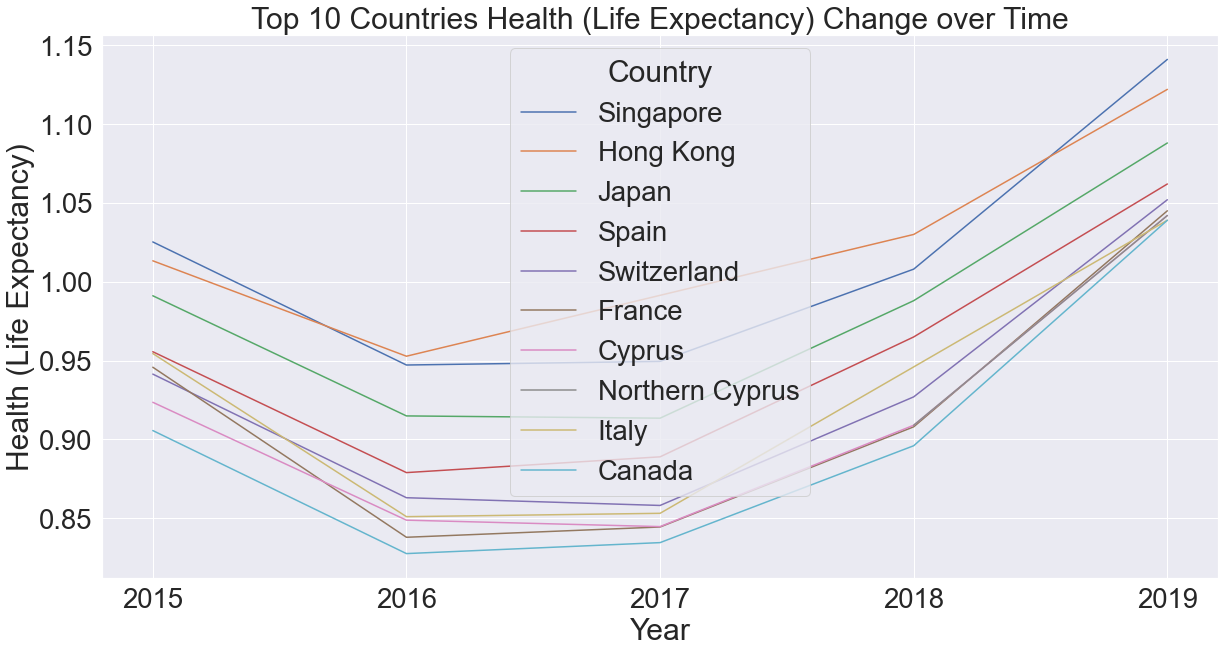

In [87]:
plt.figure(figsize=(20,10))
countries = ["Singapore","Hong Kong","Japan","Spain","Switzerland","France", "Cyprus", "Northern Cyprus", "Italy", "Canada"]
df46 = maindf2_tten_2019_lc.loc[maindf2_tten_2019_lc.Country.isin(countries)].reset_index(drop=True)
sns.lineplot(data=df46, x="Year", y="Health (Life Expectancy)",hue="Country")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.title("Top 10 Countries Health (Life Expectancy) Change over Time")
#plt.legend(bbox_to_anchor=(1.025, 1), borderaxespad=0)
plt.savefig("TopHLE_linechart2.png")
#sns.set(font_scale=2.5)
plt.show()

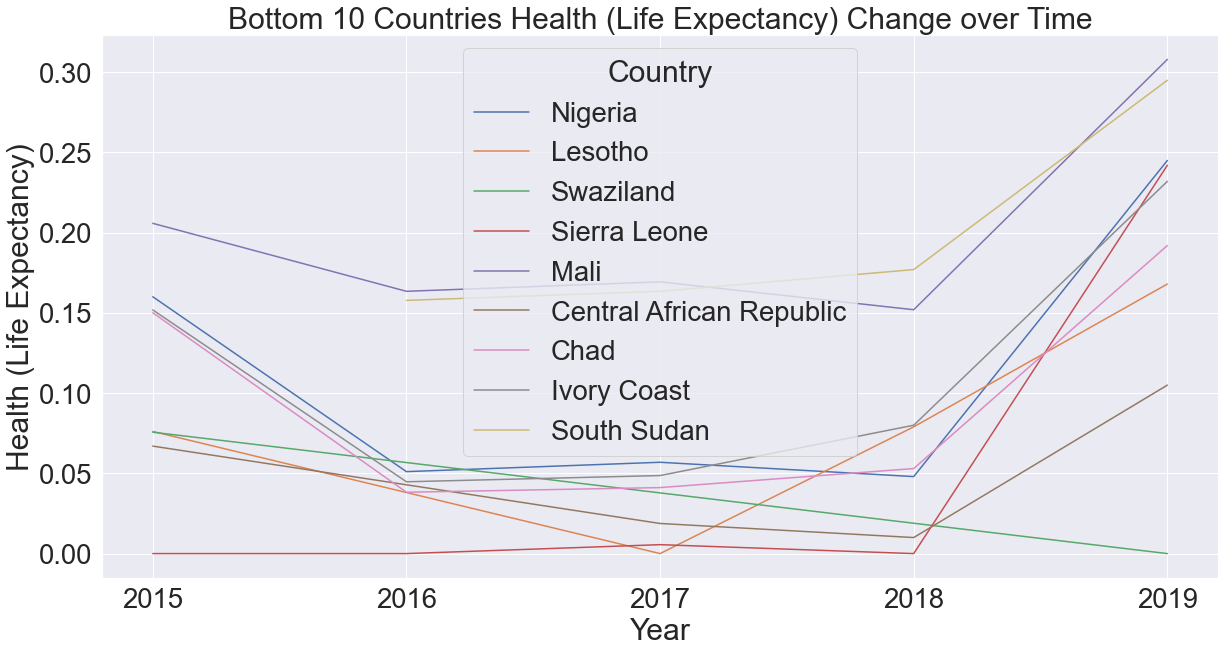

In [88]:
plt.figure(figsize=(20,10))
countries = ["Swaziland","Central African Republic","Lesotho","Chad","Ivory Coast","Sierra Leone", "Nigeria", "Somolia", "South Sudan", "Mali"]
df19 = maindf.loc[maindf.Country.isin(countries)].reset_index(drop=True)
sns.lineplot(data=df19, x="Year", y="Health (Life Expectancy)",hue="Country")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.title("Bottom 10 Countries Health (Life Expectancy) Change over Time")
#plt.legend(bbox_to_anchor=(1.025, 1), borderaxespad=0)
plt.savefig("Bottom_HLE_linechart.png")
plt.show()

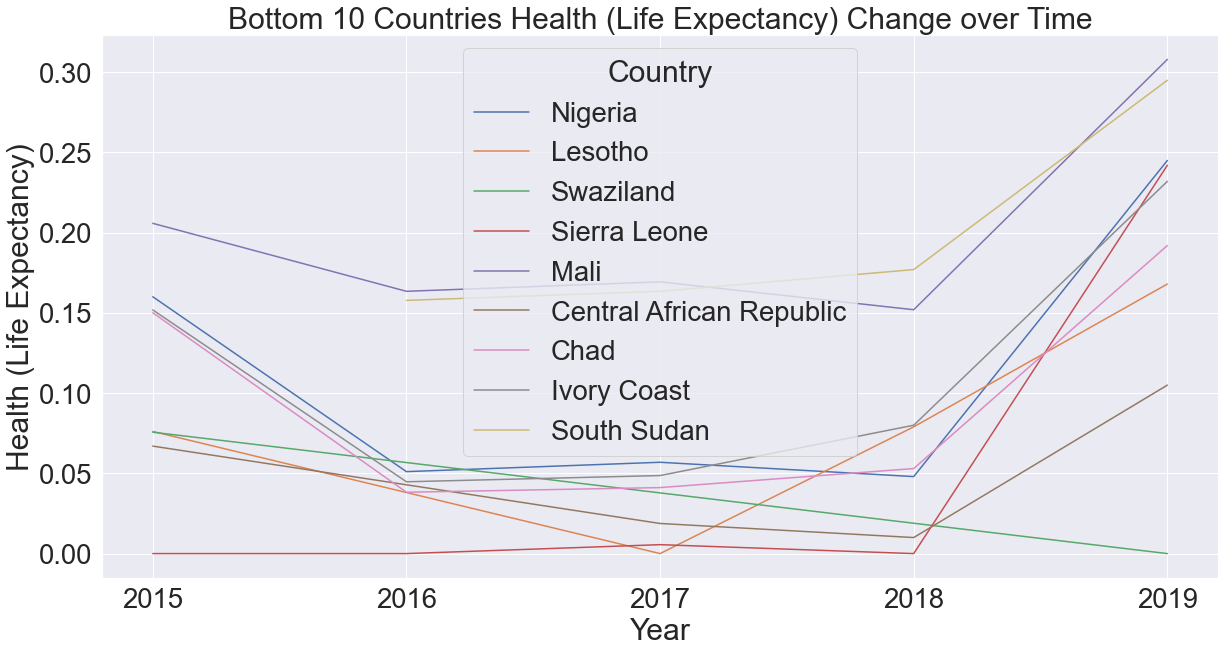

In [50]:
plt.figure(figsize=(20,10))
countries = ["Swaziland","Central African Republic","Lesotho","Chad","Ivory Coast","Sierra Leone", "Nigeria", "Somolia", "South Sudan", "Mali"]
df19 = maindf.loc[maindf.Country.isin(countries)].reset_index(drop=True)
sns.lineplot(data=df19, x="Year", y="Health (Life Expectancy)",hue="Country")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.title("Bottom 10 Countries Health (Life Expectancy) Change over Time")
#plt.legend(bbox_to_anchor=(1.025, 1), borderaxespad=0)
plt.savefig("Lowest_HLE_linechart.png")
#sns.set(font_scale=2.5)
plt.show()

In [30]:
#maindf2_tten_lc = maindf.loc[maindf["Year"] == 2015]
maindf2_tten = maindf.sort_values(by="Health (Life Expectancy)", ascending=False).reset_index(drop=True)
maindf2_tten.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Singapore,1.572,6.262,34,1.141,0.271,1.463,0.556,2019
1,Hong Kong,1.438,5.430,76,1.122,0.258,1.277,0.440,2019
2,Japan,1.327,5.886,58,1.088,0.069,1.419,0.445,2019
3,Spain,1.286,6.354,30,1.062,0.153,1.484,0.362,2019
4,Switzerland,1.452,7.480,6,1.052,0.263,1.526,0.572,2019
5,France,1.324,6.592,24,1.045,0.111,1.472,0.436,2019
6,Cyprus,1.263,6.046,49,1.042,0.190,1.223,0.406,2019
7,Northern Cyprus,1.263,5.718,64,1.042,0.191,1.252,0.417,2019
8,Italy,1.294,6.223,36,1.039,0.158,1.488,0.231,2019
9,Canada,1.365,7.278,9,1.039,0.285,1.505,0.584,2019


In [31]:
#maindf2_tten_lc = maindf.loc[maindf["Year"] == 2015]
maindf2_bten = maindf.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_bten.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Swaziland,0.811000,4.212,135,0.000000,0.074000,1.149000,0.313000,2019
1,Sierra Leone,0.330240,4.507,123,0.000000,0.214880,0.955710,0.408400,2015
2,Sierra Leone,0.364850,4.635,111,0.000000,0.238970,0.628000,0.306850,2016
3,Lesotho,0.521021,3.808,139,0.000000,0.157497,1.190095,0.390661,2017
4,Sierra Leone,0.256000,4.571,113,0.000000,0.238000,0.813000,0.355000,2018
5,Sierra Leone,0.368421,4.709,106,0.005565,0.293041,0.984136,0.318698,2017
6,Central African Republic,0.024000,3.083,155,0.010000,0.218000,0.000000,0.305000,2018
7,Central African Republic,0.000000,2.693,155,0.018773,0.280876,0.000000,0.270842,2017
8,Chad,0.422140,3.763,144,0.038240,0.186670,0.631780,0.128070,2016
9,Chad,0.438013,3.936,137,0.041135,0.216114,0.953856,0.162342,2017


In [32]:
maindf2_bten_lc = maindf2.sort_values(by="Health (Life Expectancy)", ascending=True).reset_index(drop=True)
maindf2_bten_lc.head(10)

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
0,Sierra Leone,0.330240,4.507,123,0.000000,0.214880,0.955710,0.408400,2015
1,Sierra Leone,0.256000,4.571,113,0.000000,0.238000,0.813000,0.355000,2018
2,Lesotho,0.521021,3.808,139,0.000000,0.157497,1.190095,0.390661,2017
3,Sierra Leone,0.364850,4.635,111,0.000000,0.238970,0.628000,0.306850,2016
4,Swaziland,0.811000,4.212,135,0.000000,0.074000,1.149000,0.313000,2019
5,Sierra Leone,0.368421,4.709,106,0.005565,0.293041,0.984136,0.318698,2017
6,Central African Republic,0.024000,3.083,155,0.010000,0.218000,0.000000,0.305000,2018
7,Central African Republic,0.000000,2.693,155,0.018773,0.280876,0.000000,0.270842,2017
8,Chad,0.422140,3.763,144,0.038240,0.186670,0.631780,0.128070,2016
9,Chad,0.438013,3.936,137,0.041135,0.216114,0.953856,0.162342,2017


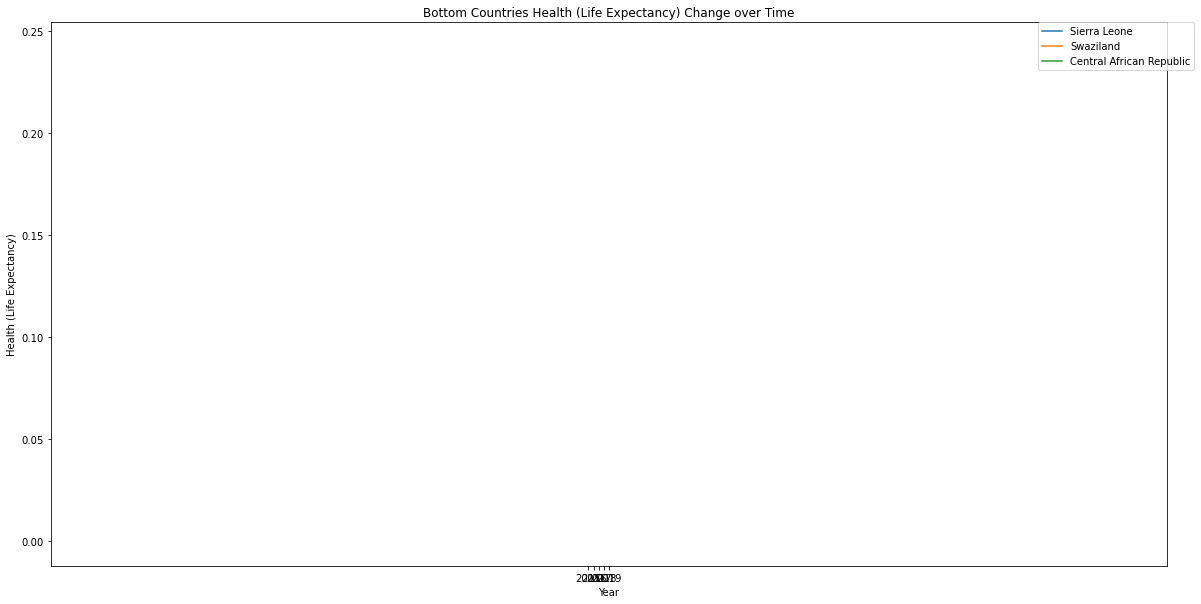

In [40]:
plt.figure(figsize=(20,10))
countries = ["Swaziland","Sierra Leone","Central African Republic","Chand"]
df47 = bten_2019_df5[bten_2019_df5.Country.isin(countries)].reset_index(drop=True)
sns.lineplot(data=df47, x="Year", y="Health (Life Expectancy)",hue="Country")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.title("Bottom Countries Health (Life Expectancy) Change over Time")
plt.legend(bbox_to_anchor=(1.025, 1), borderaxespad=0)
plt.savefig("BottomHLE_linechart.png")
plt.show()

In [34]:
substitute = (maindf2.index <=10) & (maindf2["Year"]==2015)
bten_2015_df = maindf2.loc[substitute]
bten_2015_df

,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
1,Iceland,1.30232,7.561,2,0.94784,0.43630,1.40223,0.62877,2015
0,Switzerland,1.39651,7.587,1,0.94143,0.29678,1.34951,0.66557,2015
9,Australia,1.33358,7.284,10,0.93156,0.43562,1.30923,0.65124,2015
10,Israel,1.22857,7.278,11,0.91387,0.33172,1.22393,0.41319,2015
7,Sweden,1.33171,7.364,8,0.91087,0.36262,1.28907,0.65980,2015
8,New Zealand,1.25018,7.286,9,0.90837,0.47501,1.31967,0.63938,2015
4,Canada,1.32629,7.427,5,0.90563,0.45811,1.32261,0.63297,2015
6,Netherlands,1.32944,7.378,7,0.89284,0.47610,1.28017,0.61576,2015
5,Finland,1.29025,7.406,6,0.88911,0.23351,1.31826,0.64169,2015
3,Norway,1.45900,7.522,4,0.88521,0.34699,1.33095,0.66973,2015


In [39]:

substitute3 = (maindf["Year"]==2019)
bten_2019_df5 = maindf.loc[substitute3].reset_index(drop=True)
bten_2019_df5.nsmallest(10,['Health (Life Expectancy)'])


,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year
134,Swaziland,0.811,4.212,135,0.000,0.074,1.149,0.313,2019
154,Central African Republic,0.026,3.083,155,0.105,0.235,0.000,0.225,2019
143,Lesotho,0.489,3.802,144,0.168,0.107,1.169,0.359,2019
131,Chad,0.350,4.350,132,0.192,0.198,0.766,0.174,2019
98,Ivory Coast,0.569,4.944,99,0.232,0.154,0.808,0.352,2019
128,Sierra Leone,0.268,4.374,129,0.242,0.252,0.841,0.309,2019
84,Nigeria,0.696,5.265,85,0.245,0.215,1.111,0.426,2019
111,Somalia,0.000,4.668,112,0.268,0.243,0.698,0.559,2019
155,South Sudan,0.306,2.853,156,0.295,0.202,0.575,0.010,2019
127,Mali,0.385,4.390,128,0.308,0.153,1.105,0.327,2019


In [37]:
substitute4 = (maindf["Health (Life Expectancy)"] >=156) & (maindf["Year"]==2019)
bten_2019_df = maindf.loc[substitute4].reset_index(drop=False)
bten_2019_df

,index,Country,Economy (GDP per Capita),Happiness Score,Happiness Rank,Health (Life Expectancy),Generosity,Social Support,Freedom,Year


In [ ]:
lowest = maindf.groupby(["Country"])[["Happiness Score", "Health (Life Expectancy)"]].min()
lowest

In [ ]:
highest = maindf.groupby(["Country"])[["Happiness Score", "Health (Life Expectancy)"]].max()
highest

In [ ]:
range_val = highest - lowest
range_val

In [ ]:
range_val.sort_values(by="Happiness Score", ascending=False)

In [ ]:
range_val.sort_values(by="Health (Life Expectancy)", ascending=False)

In [ ]:
mask1 = maindf["Country"]=="Venezuela"
ven_df = maindf[mask1]
ven_df

In [ ]:
mask2 = maindf["Country"]=="Benin"
ben_df = maindf[mask2]
ben_df

In [ ]:
ven_df[["Happiness Score", "Health (Life Expectancy)"]].plot(subplots=True)

In [ ]:
x = maindf.groupby('Year').plot.scatter(x='Happiness Score', y='Health (Life Expectancy)')


In [ ]:
maindf.groupby("Happiness Score").head()

In [ ]:
bar1 = maindf.groupby(["Year","Health (Life Expectancy)","Happiness Score" ]).head()
bar1

In [ ]:
sns.barplot(x='Health (Life Expectancy)',y='Country',data=df1.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r").set(title="2015")
#plt.savefig("2015_HLE_barchart.png")

In [ ]:
sns.barplot(x='Health (Life Expectancy)',y='Country',data=df2.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r").set(title="2016")
#plt.savefig("2016_HLE_barchart.png")

In [ ]:
sns.barplot(x='Health..Life.Expectancy.',y='Country',data=df3.nlargest(10,'Health..Life.Expectancy.'),palette="rainbow_r").set(title="2017")
#plt.savefig("2017_HLE_barchart.png")

In [ ]:
sns.barplot(x='Healthy life expectancy',y='Country or region',data=df4.nlargest(10,'Healthy life expectancy'),palette="rainbow_r").set(title="2018")
#plt.savefig("2018_HLE_barchart.png")

In [ ]:
sns.barplot(x='Healthy life expectancy',y='Country or region',data=df5.nlargest(10,'Healthy life expectancy'),palette="rainbow_r").set(title="2019")
#plt.savefig("2019_HLE_barchart.png")

In [ ]:
sns.barplot(x='Health (Life Expectancy)',y='Country',data=maindf.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r").set(title="2015 - 2019")
plt.savefig("2015-2019_HLE_barchart.png")

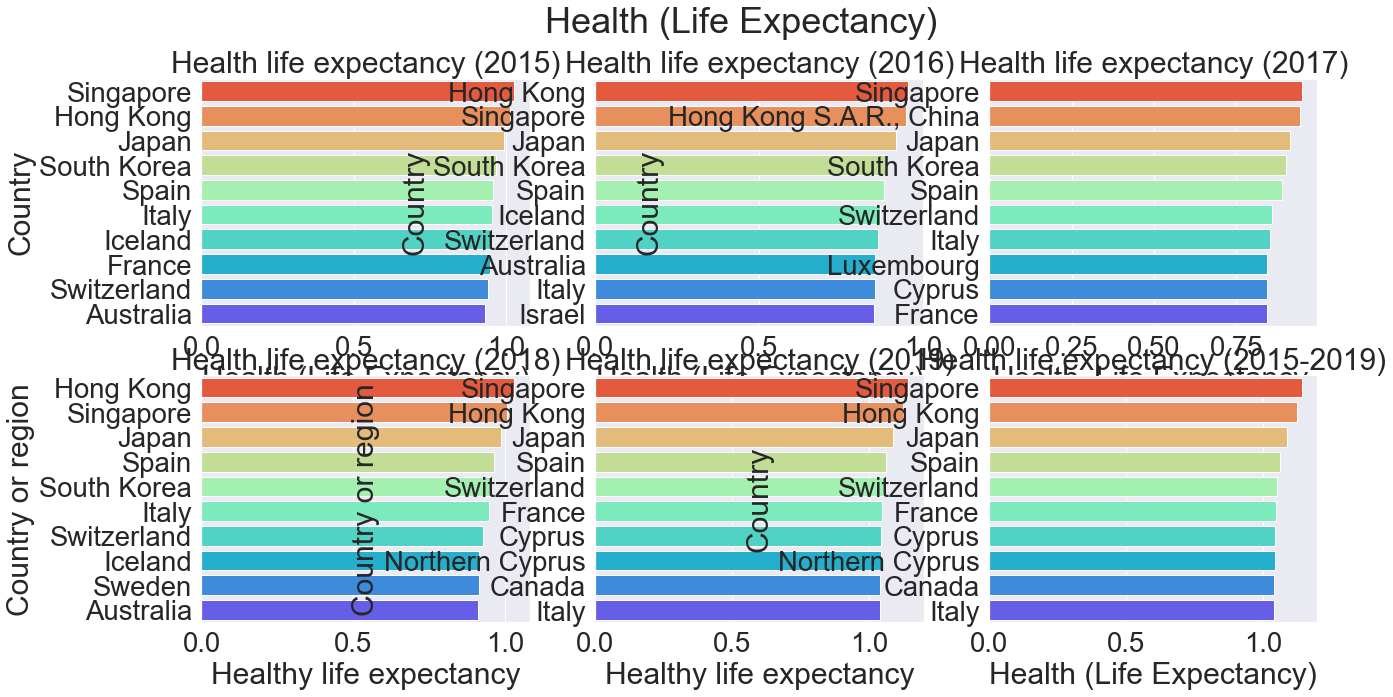

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

fig.suptitle('Health (Life Expectancy)')

sns.barplot(ax=axes[0, 0], data=df1.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r", orient="h", x='Health (Life Expectancy)', y='Country').set(title='Health life expectancy (2015)')
sns.barplot(ax=axes[0, 1], data=df2.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r", orient="h",x='Health (Life Expectancy)', y='Country').set(title='Health life expectancy (2016)')
sns.barplot(ax=axes[0, 2], data=df3.nlargest(10,'Health..Life.Expectancy.'),palette="rainbow_r", orient="h",x='Health..Life.Expectancy.', y='Country').set(title='Health life expectancy (2017)')
sns.barplot(ax=axes[1, 0], data=df4.nlargest(10,'Healthy life expectancy'),palette="rainbow_r", orient="h", x='Healthy life expectancy', y='Country or region').set(title='Health life expectancy (2018)')
sns.barplot(ax=axes[1, 1], data=df5.nlargest(10,'Healthy life expectancy'),palette="rainbow_r", orient="h",x='Healthy life expectancy', y='Country or region').set(title='Health life expectancy (2019)')
sns.barplot(ax=axes[1, 2], data=maindf.nlargest(10,'Health (Life Expectancy)'),palette="rainbow_r", orient="h", x='Health (Life Expectancy)', y='Country').set(title='Health life expectancy (2015-2019)')
#fig.tight_layout(pad=5.0)
sns.set(font_scale=2)

plt.show()     

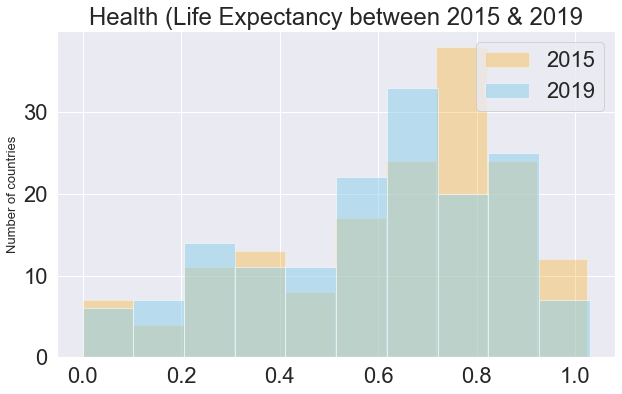

In [104]:
#for 2015 and 2018
plt.figure(figsize=(10,6))
a=10
plt.hist(df1["Health (Life Expectancy)"],a,label='2015',alpha=0.3,color='orange')
plt.hist(df4["Healthy life expectancy"],a,label='2019',alpha=0.5,color='skyblue')
plt.ylabel('Number of countries',size=13)
plt.legend(loc='upper right')
plt.title("Health (Life Expectancy between 2015 & 2019")
plt.show()

In [ ]:
#country_avg = maindf.groupby(['Year','Country'])['Health (Life Expectancy)'].mean().sort_values('Health(Life Expectancy)').reset_index()
#country_avg = country_avg.sort_values('Health (Life Expectancy)')
#country_avg.head(20)

In [ ]:
#country_avg = maindf.groupby(['Year','Country'])['Health (Life Expectancy)'].mean().rename(columns:“mean”)
#country_avg

In [ ]:
bar1[bar1["Country"]=="Switzerland"]

In [ ]:
chart1 = bar1.sort_values(by=['Health (Life Expectancy)'], ascending=False).iloc[:5,[0,4]]
chart1

In [ ]:
chart1["Country"]

In [ ]:
Chart3 = maindf.sort_values(by=['Health (Life Expectancy)'], ascending=True).iloc[:5,[0,4]]
Chart3    

In [ ]:
chart2 = bar1.sort_values(by=['Health (Life Expectancy)'], ascending=False).iloc[:,[0,2,4,8]]
chart2.head(25)

In [ ]:
chart2 = bar1.sort_values(by=['Health (Life Expectancy)'], ascending=False).iloc[0:10,[0,2,4,8]]
chart2.head(10)

In [ ]:
chart2 = bar1.sort_values(by=['Health (Life Expectancy)'], ascending=False).iloc[-10:,[0,2,4,8]]
chart2

In [ ]:
x = maindf[maindf["Year"] == 2015]["Happiness Score"]
y = maindf[maindf["Year"] == 2015]["Health (Life Expectancy)"]
plt.scatter(x, y)
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2015")

plt.show()

The r-squared is: 0.5244650535503466


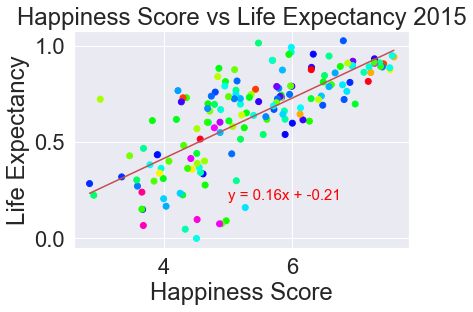

In [97]:

x_values = maindf[maindf["Year"] == 2015]["Happiness Score"]
y_values = maindf[maindf["Year"] == 2015]["Health (Life Expectancy)"]

plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2015")


z = np.random.normal(0,1,158)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, c=z, cmap="hsv")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.2),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
x = maindf[maindf["Year"] == 2016]["Happiness Score"]
y = maindf[maindf["Year"] == 2016]["Health (Life Expectancy)"]

plt.scatter(x, y)
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2016")

plt.show()

The r-squared is: 0.585813179396469


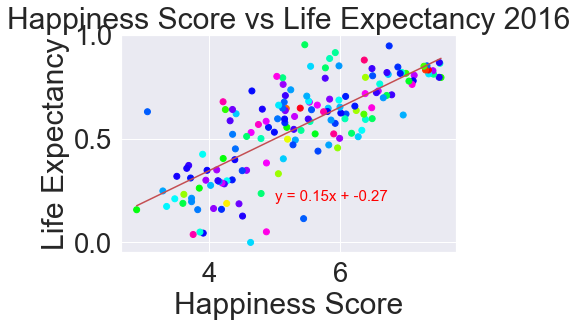

In [71]:
x_values = maindf[maindf["Year"] == 2016]["Happiness Score"]
y_values = maindf[maindf["Year"] == 2016]["Health (Life Expectancy)"]

plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2016")
z = np.random.normal(0,1,157)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,  c=z, cmap="hsv")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.2),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
x = maindf[maindf["Year"] == 2017]["Happiness Score"]
y = maindf[maindf["Year"] == 2017]["Health (Life Expectancy)"]
plt.scatter(x, y)
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2017")


plt.show()

The r-squared is: 0.6114467796235596


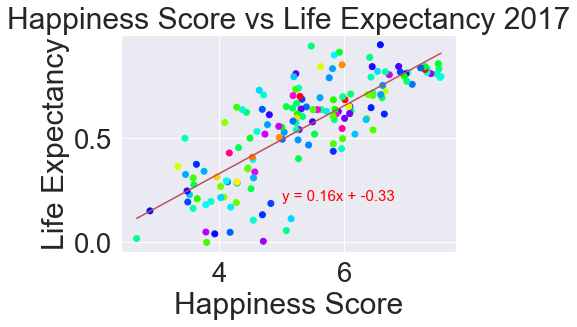

In [72]:
x_values = maindf[maindf["Year"] == 2017]["Happiness Score"]
y_values = maindf[maindf["Year"] == 2017]["Health (Life Expectancy)"]


plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2017")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
z = np.random.normal(0,1,155)
plt.scatter(x_values, y_values, c=z, cmap="hsv")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.2),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
x = maindf[maindf["Year"] == 2018]["Happiness Score"]
y = maindf[maindf["Year"] == 2018]["Health (Life Expectancy)"]
plt.scatter(x, y)
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2018")

plt.show()

The r-squared is: 0.6018867471122608


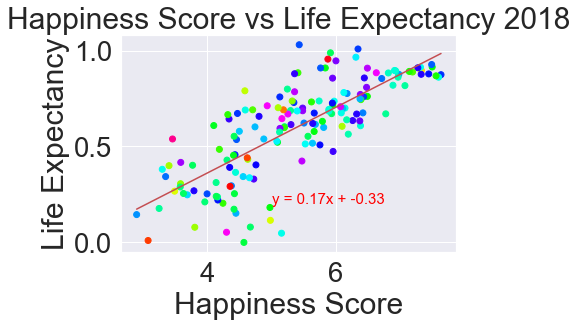

In [73]:
x_values = maindf[maindf["Year"] == 2018]["Happiness Score"]
y_values = maindf[maindf["Year"] == 2018]["Health (Life Expectancy)"]


plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2018")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
z = np.random.normal(0,1,156)
plt.scatter(x_values, y_values,c=z, cmap="hsv" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.2),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
x = maindf[maindf["Year"] == 2019]["Happiness Score"]
y = maindf[maindf["Year"] == 2019]["Health (Life Expectancy)"]
plt.scatter(x, y)
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2019")

plt.show()

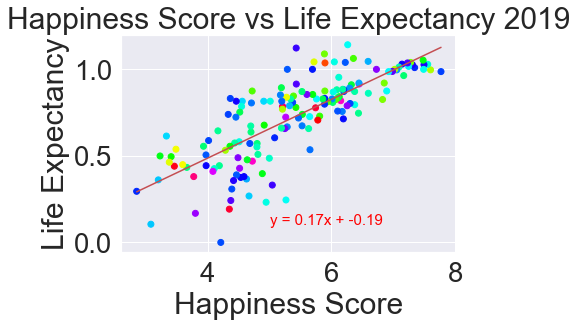

In [74]:
x_values = maindf[maindf["Year"] == 2019]["Happiness Score"]
y_values = maindf[maindf["Year"] == 2019]["Health (Life Expectancy)"]


plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Happiness Score vs Life Expectancy 2019")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

z = np.random.normal(0,1,156)
plt.scatter(x_values, y_values, c=z, cmap="hsv" )
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.1),fontsize=15,color="red")

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.scatterplot(ax=axes[0][0],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2015] ,hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2015')
sns.scatterplot(ax=axes[0][1],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2016], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2016')
sns.scatterplot(ax=axes[1][0],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2017], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2017')
sns.scatterplot(ax=axes[1][1],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2018], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2018')
sns.scatterplot(ax=axes[0][2],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2019], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2019')
sns.scatterplot(ax=axes[1][2],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2, hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2015-2019')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
sns.scatterplot(ax=axes[0][0],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2015] ,hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2015')
sns.scatterplot(ax=axes[0][1], x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2016], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2016')
sns.scatterplot(ax=axes[1][0],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2017], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2017')
sns.scatterplot(ax=axes[1][1],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2018], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2018')
sns.scatterplot(ax=axes[0][2],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2[chart2["Year"]==2019], hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2019')
sns.scatterplot(ax=axes[1][2],x='Happiness Score', y='Health (Life Expectancy)',palette= 'rainbow_r', data=chart2, hue='Happiness Score').set(title='Healthy life expectancy vs. Happiness Score 2015-2019')
plt.show()

In [ ]:
df1.quantile([.25, .50, .75])

In [ ]:
size_bins = [0, 0.439185, 0.696705, 0.811013, 1.0]
group_names = ["Bottom", "25th Percentile", "Middle", "Top"]

In [ ]:
df1["Health (Life Expectancy) Categorical"] = pd.cut(df1["Health (Life Expectancy)"], size_bins, labels=group_names, right=False)
df1

In [ ]:
maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()


In [ ]:
avgdf = maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()

In [ ]:
avgdf.quantile([.25, .50, .75])

In [ ]:
size_bins = [0, 0.424205, 0.665635, 0.781592, 1.7]
group_names = ["lowest", "lower average", "high average", "highest"]

In [ ]:
avgdf["Health (Life Expectancy)"] = pd.cut(avgdf["Health (Life Expectancy)"], size_bins, labels=group_names, right=False)
avgdf

In [ ]:
avgdf = maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()
avgdf["Health (Life Expectancy) Categorical"] = pd.cut(avgdf["Health (Life Expectancy)"], size_bins, labels=group_names, right=False)
avgdf

In [ ]:
avgdf = maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()
avgdf["Health (Life Expectancy) Categorical"] = pd.cut(avgdf["Health (Life Expectancy)"], size_bins, labels=group_names, right=False)
avgdf.rename(columns={"Happiness Score": "Average Happiness Score", "Health (Life Expectancy)": "Average Health (Life Expectancy)"})

In [ ]:
sns.violinplot(data=avgdf, x="Health (Life Expectancy) Categorical", y="Happiness Score")

In [ ]:
maindf.groupby("Year")[["Health (Life Expectancy)", "Happiness Score"]].apply(lambda x: x.sort_values("Happiness Score"))

In [ ]:
line_df = maindf.groupby("Year")[["Health (Life Expectancy)", "Happiness Score"]].apply(lambda x: x.sort_values("Happiness Score")).reset_index()

In [ ]:
pd.pivot_table(line_df, index='level_1', columns='Year', values='Health (Life Expectancy)').plot(subplots=True, sharey=True, figsize=(5,10))
plt.show()

In [ ]:
line_df

In [ ]:
line_df.head()

In [ ]:
df1.head(10)

In [ ]:
hle_df15 = df1.head(10)
hle_df16 = df2.head(10)
hle_df17 = df3.head(10)
hle_df18 = df4.head(10)
hle_df19 = df5.head(10)


In [ ]:
plt.figure(figsize=(12,8))
countries = ["Switzerland","Iceland","Denmark","Iran","Vietnam","India"]
df23 = maindf.loc[maindf.Country.isin(countries)].reset_index(drop=True)
sns.lineplot(data=df23, x="Year", y="Health (Life Expectancy)",hue="Country")
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.title("Health (Life Expectancy) Change over Time")
plt.legend(bbox_to_anchor=(1.025, 1), borderaxespad=0)
plt.show()

In [ ]:
maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).max()

In [ ]:
avg_df = maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()
avg_df["Health (Life Expectancy) Categorical"] = pd.cut(df1["Health (Life Expectancy)"], size_bins, labels=group_names, right=False)
avg_df

In [ ]:
maindf.quantile([.25, .50, .75])

In [ ]:
size_bins = [0, 0.440183, 0.647310, 0.808000, 1.5]
group_names = ["Bottom", "25th Percentile", "Middle", "Top"]

In [ ]:
avg_df.quantile([.25, .50, .75])

In [ ]:
size_bins2 = [0, 0.557619, 0.597346, 0.630259, 1.5]
group_names2 = ["Bottom", "25th Percentile", "Middle", "Top"]

In [ ]:
avg_df = maindf.groupby('Year')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()
avg_df

In [ ]:
avg_df["Health (Life Expectancy) Categorical"] = pd.cut(df1["Health (Life Expectancy)"], size_bins2, labels=group_names2 , right=False)
avg_df

In [ ]:
avg_df = maindf.groupby('Country')[["Health (Life Expectancy)", "Happiness Score"]].agg({"Health (Life Expectancy)": "mean", "Happiness Score": "mean"}).reset_index()
avg_df["Health (Life Expectancy) Categorical"] = pd.cut(df1["Health (Life Expectancy)"], size_bins2, labels=group_names2 , right=False)
avg_df.rename(columns={"Happiness Score": "Average Happiness Score", "Health (Life Expectancy)": "Average Health (Life Expectancy)"})

In [ ]:
sns.violinplot(data=maindf, x="Year", y="Health (Life Expectancy)", palette='rainbow_r')
plt.title("Average Health (Life Expectancy)")
plt.savefig("2015-2019_HLE_violinchart.png")

In [ ]:
maindf.groupby("Year")["Health (Life Expectancy)"].mean()

In [ ]:
sns.boxplot(data=maindf, x="Year", y="Health (Life Expectancy)", palette='rainbow_r')
plt.title("Average Health (Life Expectancy)")
plt.savefig("2015-2019_HLE_boxplot.png")

In [75]:
maindf2 = maindf.reset_index(drop=True)

In [76]:
import seaborn as sns
from scipy import stats as st

# linear modeling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [77]:
def checkShapeOfData(df, col):
    # make histogram plot
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, color="cyan", palette="rainbow_r", kde=True)
    plt.title(f"HistPlot of {col}")
    plt.show()
    print()
    
    # boxplots
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, y=col, palette="rainbow_r" )
    plt.title(f"Boxplot of {col}")
    plt.show()
    print()
    
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = df[col].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # normaltest
    print()
    print("Normal test:")
    num = int(len(df)*0.1)
#     print(st.normaltest(df[col].sample(num)))



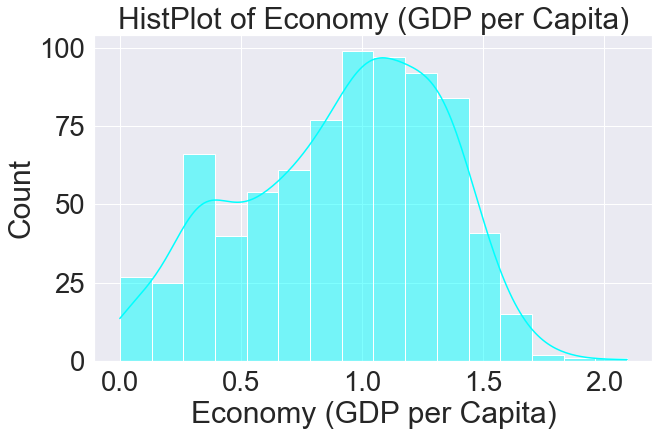

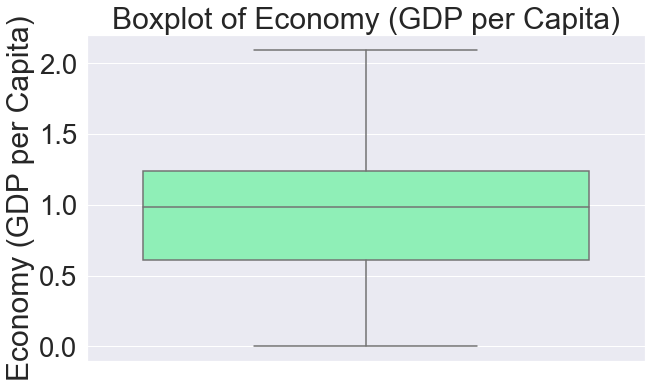


Values below -0.3380306634902951 could be outliers.
Values above 2.1807177724838254 could be outliers.

Normal test:


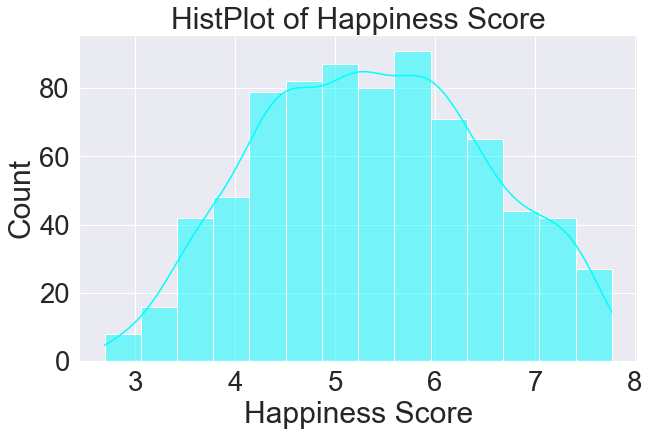

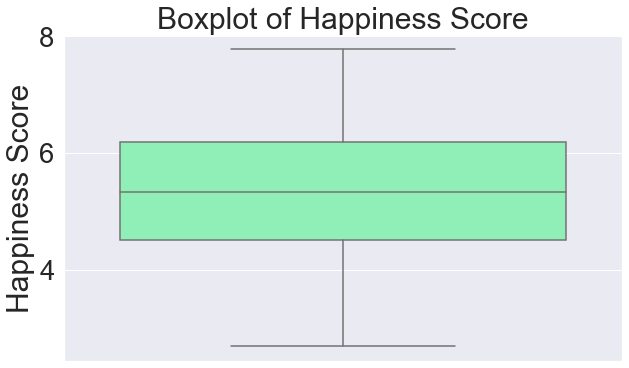


Values below 1.990125 could be outliers.
Values above 8.709125 could be outliers.

Normal test:


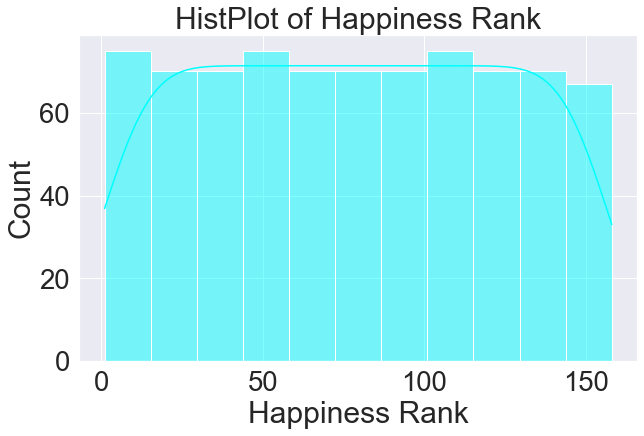

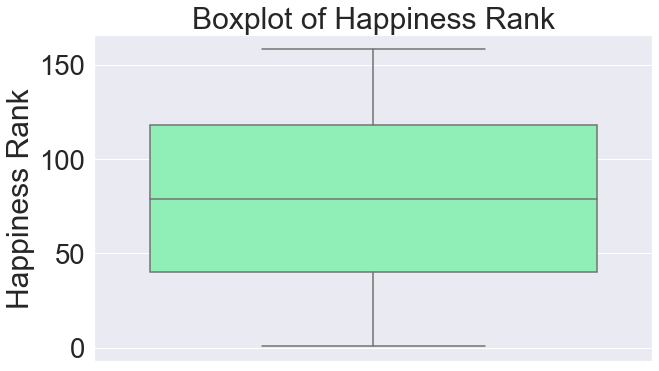


Values below -77.0 could be outliers.
Values above 235.0 could be outliers.

Normal test:


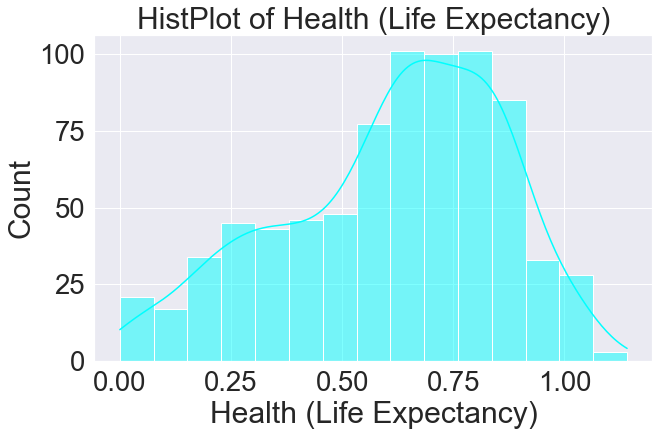

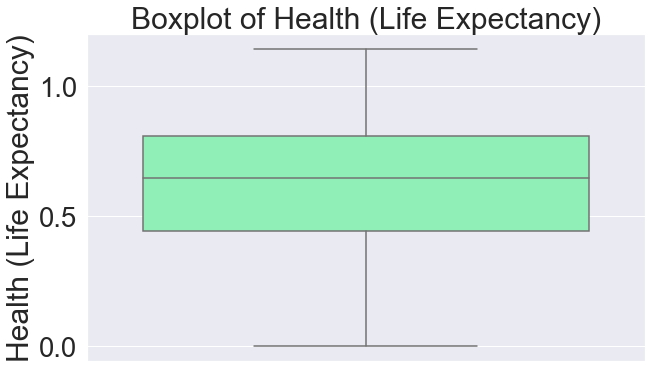


Values below -0.11154374999999994 could be outliers.
Values above 1.35972625 could be outliers.

Normal test:


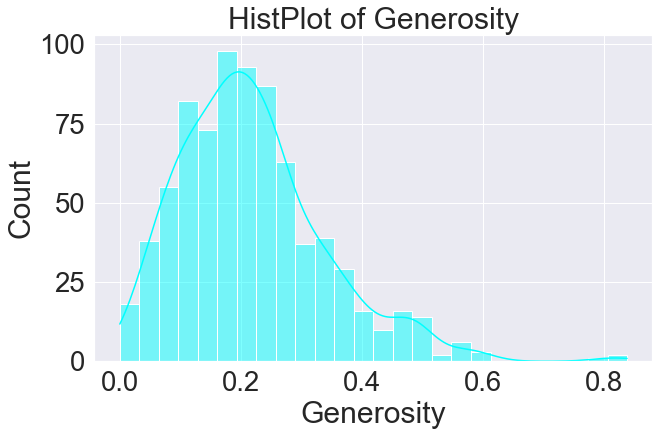

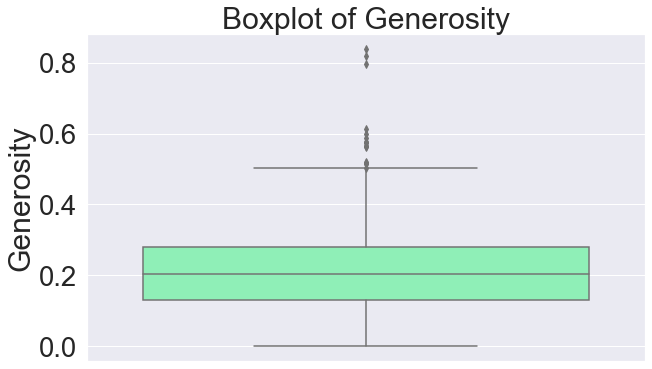


Values below -0.09324874999999996 could be outliers.
Values above 0.5020812499999999 could be outliers.

Normal test:


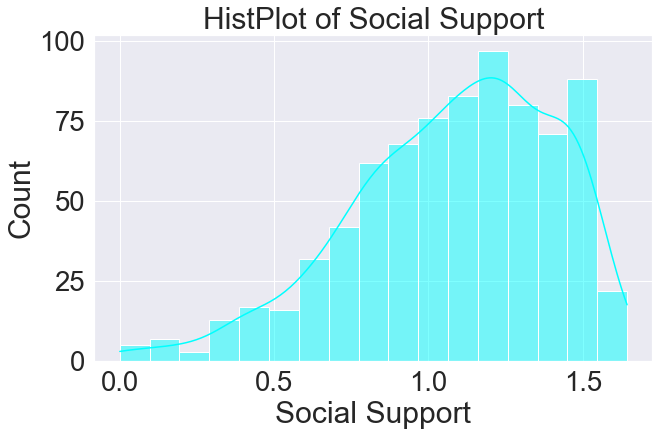

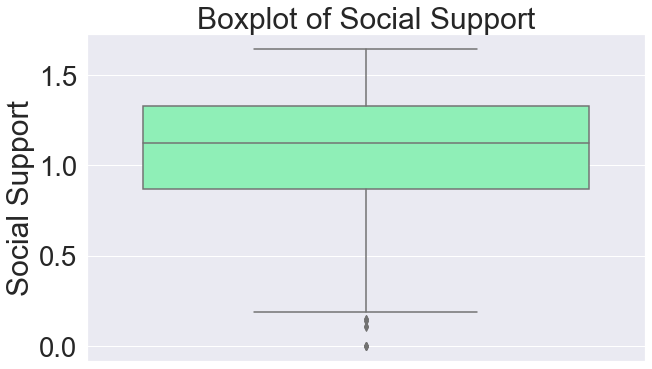


Values below 0.18253125000000003 could be outliers.
Values above 2.0140812500000003 could be outliers.

Normal test:


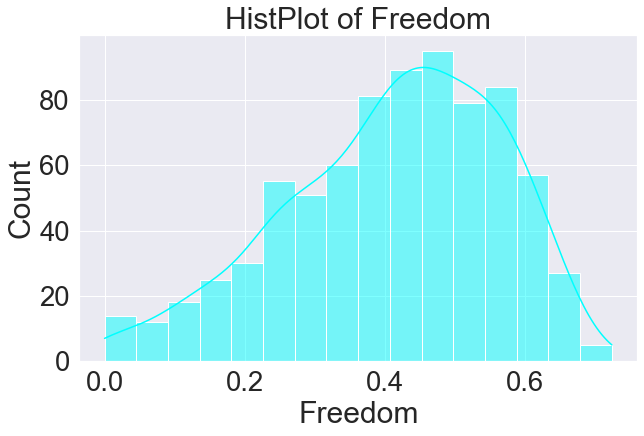

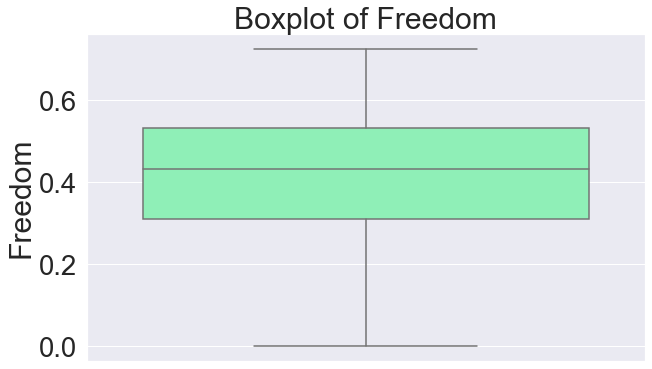


Values below -0.022081249999999997 could be outliers.
Values above 0.86284875 could be outliers.

Normal test:


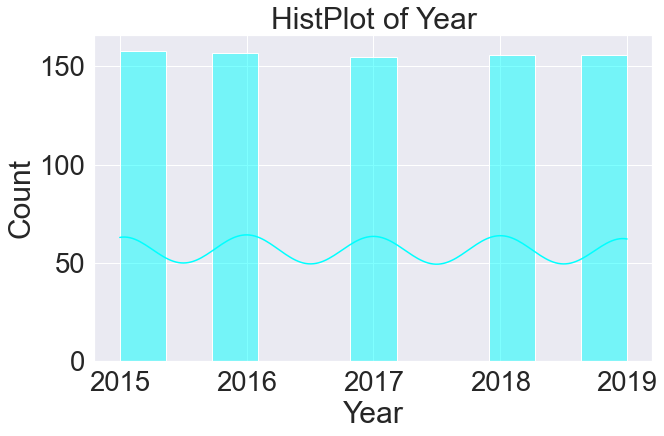

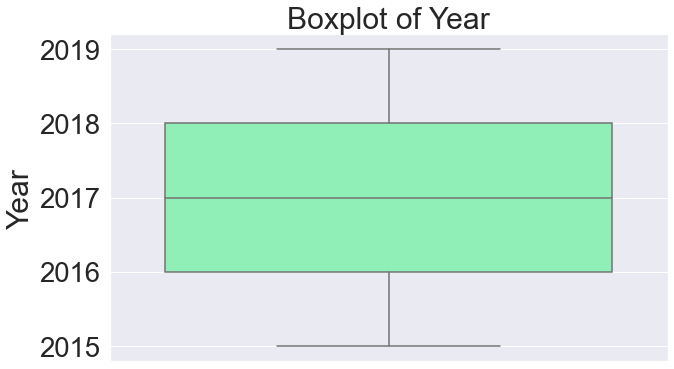


Values below 2013.0 could be outliers.
Values above 2021.0 could be outliers.

Normal test:


In [78]:
cols = maindf2.describe().columns
for col in cols:
    checkShapeOfData(maindf2, col)

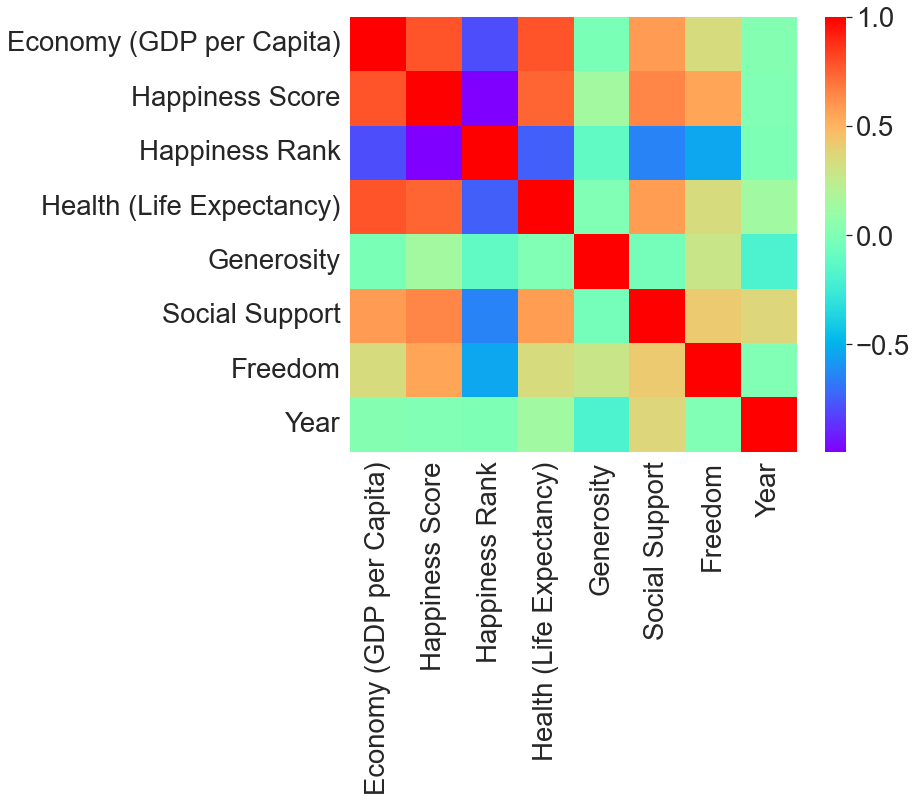

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(maindf.corr(), annot = False, cmap='rainbow')
plt.show()

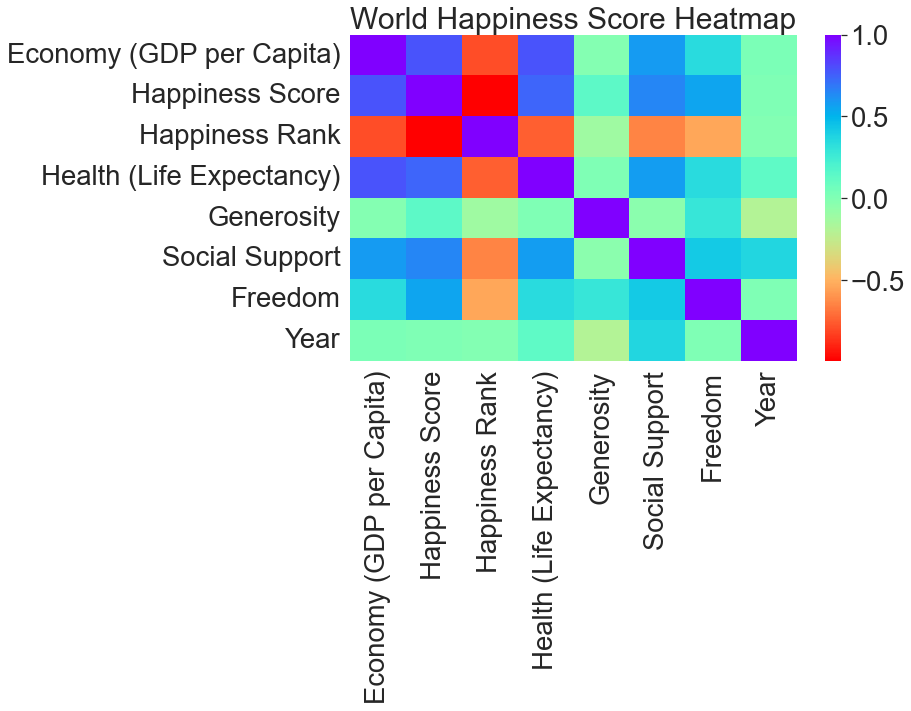

In [80]:
corrs = maindf2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrs, cmap="rainbow_r")
plt.title("World Happiness Score Heatmap")
plt.show()

In [81]:
feature = maindf.loc[:,["Economy (GDP per Capita)",  "Happiness Score", "Generosity", "Social Support", "Freedom"]]
target = maindf["Health (Life Expectancy)"]

In [82]:
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Health (Life Expectancy)   R-squared:                       0.662
Model:                                  OLS   Adj. R-squared:                  0.659
Method:                       Least Squares   F-statistic:                     303.3
Date:                      Mon, 14 Nov 2022   Prob (F-statistic):          8.97e-180
Time:                              13:26:00   Log-Likelihood:                 403.85
No. Observations:                       782   AIC:                            -795.7
Df Residuals:                           776   BIC:                            -767.7
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0815      0.029     -2.808      0.005      -0.138      -0.025
Economy (GDP per Capita)     0.3015      0.022     13.936      0.000       0.259       0.344
Happiness Score              0.0687      0.009      7.584      0.000       0.051       0.086
Generosity                  -0.0221      0.046     -0.484      0.629      -0.112       0.068
Social Support               0.0720      0.021      3.353      0.001       0.030       0.114
Freedom                     -0.0593      0.043     -1.374      0.170      -0.144       0.025
==============================================================================
Omnibus:                       42.548   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.880
Skew:                          -0.522   Prob(JB):                     5.42e-12
Kurtosis:                       3.708   Cond. No.                         56.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
 # SCIKIT_LEARN

reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)
print(reg.score(np.array(feature), np.array(target)))

[ 0.30150129  0.0686511  -0.02207382  0.07198095 -0.05928775]
-0.08147567716425674
0.6615192571871473


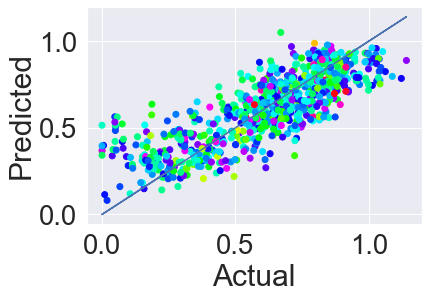

In [84]:
z = np.random.normal(0,1,782)
plt.scatter(target, reg.predict(np.array(feature)), c=z, cmap='hsv')
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Reg_Pred_scatterplot.png")
plt.show()


In [85]:
rf = RandomForestRegressor()
rf.fit(np.array(feature), np.array(target))
print(rf.score(np.array(feature), np.array(target)))

0.9611812092780548


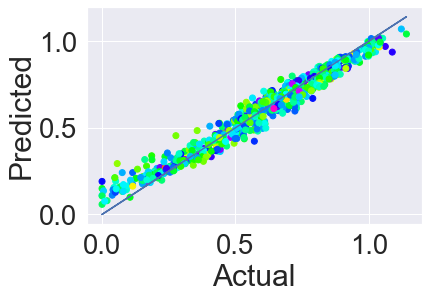

In [86]:
z = np.random.normal(0,1,782)
plt.scatter(target, rf.predict(np.array(feature)), c=z, cmap='hsv')
plt.plot(target, target)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("RanFor_Pred_scatterplot.png")
plt.show()

In [93]:
data=feature.iloc[2]
data

Economy (GDP per Capita)    1.32548
Happiness Score             7.52700
Generosity                  0.34139
Social Support              1.36058
Freedom                     0.64938
Name: 2, dtype: float64

In [91]:
feature.describe()

,Economy (GDP per Capita),Happiness Score,Generosity,Social Support,Freedom
count,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.916047,5.379018,0.218576,1.078392,0.411091
std,0.407340,1.127456,0.122321,0.329548,0.152880
min,0.000000,2.693000,0.000000,0.000000,0.000000
25%,0.606500,4.509750,0.130000,0.869363,0.309768
50%,0.982205,5.322000,0.201982,1.124735,0.431000
75%,1.236187,6.189500,0.278832,1.327250,0.531000
max,2.096000,7.769000,0.838075,1.644000,0.724000


In [94]:
data["Economy (GDP per Capita)"]=2.0
data["Happiness Score"]=1.0
data["Generosity"]=1.0
data["Social Support"]=1.5
data["Freedom"]=1.1

rf.predict([data])

array([0.72616341])

In [ ]:
reg.predict([data])

In [ ]:
maindf2.loc[maindf2.Country=="Australia"]

In [ ]:
test1 = feature.iloc[636]
test1

In [ ]:
test1["Freedom"] = 0.7
test1["Generosity"] = 0.8
rf.predict([test1])

In [ ]:
"""
For question:  Are larger, more developed countries happier?, we want to select Economy GDP per Capita, Country, Region, 
Happiness Score, Happiness Rank, 
"""

In [ ]:
"""
Use the groupby to group by year, then aggregate by average of gpd and happiness rank

"""

In [ ]:
for i in data_frames:
    print(i.info())


In [ ]:
for i in data_frames:
    print(i.head())